
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Linear Algebra <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 2 <br>
<font color=696880 size=4>
<!-- <br> -->
Ashkan Majidi - Mahdi Alinejad - Keyhan Hodaei - Mohammad Mahdi Abedian - Mohammad Farhan Bahrami - Mohammadhossein salimi

____

# Personal Data

In [1]:
student_number = '401105561'
first_name = 'Moeein'
last_name = 'Aali'

# Introduction

In this assignment, you will implement some Algorithms and topics which you've already learned their theoretical foundations in the class. Note that **you are not allowed to use `numpy.linalg` functions in this notebook**.

Import your needed libraries here.

In [2]:
import tester

import numpy as np
import math as math
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Q1: System of Equations (20)

In this part, you are going to solve a system of equations using the Gauss-Jordan elimination method. You will also use the results to find the conic section that fits the given data points.

First, write a function that gets an augmented matrix as its input and then returns the results if the matrix could be solved using the Gauss-Jordan elimination method. If the matrix could not be solved, the function should return an appropriate error message.  

In [3]:
def solve(matrix):
    matrix = np.array(matrix, dtype=float)
    rows_count, cols_count = matrix.shape[0], matrix.shape[1]

    for i in range(min(rows_count, cols_count - 1)):
        max_row = i + np.argmax(np.abs(matrix[i:, i]))
        if matrix[max_row, i] == 0:
            continue

        if max_row != i:
            matrix[[i, max_row]] = matrix[[max_row, i]]

        matrix[i] = matrix[i] / matrix[i, i]

        for j in range(rows_count):
            if j != i:
                matrix[j] = matrix[j] - matrix[j, i] * matrix[i]
        
    for i in range(rows_count):
        if np.all(matrix[i, :-1] == 0) and matrix[i, -1] != 0:
            return "No solution!"

    rank = sum([1 for i in range(rows_count)
               if not np.all(matrix[i, :-1] == 0)])

    if rank < cols_count - 1:
        return "Infinite solutions!"

    return matrix

Consider the [Ecliptic Coordinate System](https://en.wikipedia.org/wiki/Ecliptic_coordinate_system) in astronomy. The coordinates of a star in this system are given as $(\lambda, \beta)$, where $\lambda$ is the ecliptic longitude and $\beta$ is the ecliptic latitude. 

We will give you the position vectors of an astronomical object with respect to a distant observer for five different [true anomalies](https://en.wikipedia.org/wiki/True_anomaly).

Consider the [Conic Sections](https://en.wikipedia.org/wiki/Conic_section) in mathematics. The general form of a conic section is given as $Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0$. Every orbit of astronomical objects (such as planets, asteroids, comets, etc.) is a conic section. Conic sections are classified into four types: ellipse, parabola, hyperbola, and circle.

Fit a surface to the given points.

Surface equation: $Ax + By+ Cz + D = 0$.
We take the value of C as one, and we obtain the values of A, B, and D using the following system of equations.

\begin{align*}
\sum_{i=1}^{N} z_i &= -B \sum_{i=1}^{N} y_i - A \sum_{i=1}^{N} x_i - D N \\
\sum_{i=1}^{N} z_i y_i &= -B \sum_{i=1}^{N} y_i^2 - A \sum_{i=1}^{N} x_i y_i - D \sum_{i=1}^{N} y_i \\
\sum_{i=1}^{N} z_i x_i &= -B \sum_{i=1}^{N} x_i y_i - A \sum_{i=1}^{N} x_i^2 - D \sum_{i=1}^{N} x_i
\end{align*}



In [16]:
vectors = tester.vectors[0]
print(vectors)

[[-69.98522561 -29.6929716   -0.97627515]
 [-70.14599665 -29.71727794  -0.96350419]
 [-70.32870803 -29.86443759  -0.95875521]
 [-70.2476123  -30.38700236  -1.00888661]
 [-69.79940813 -30.38844553  -1.05014337]]


In [21]:
def surface_fit(vectors):
    C = 1
    SUM = {
        'z': 0,
        'y': 0,
        'x': 0,
        'zy': 0,
        'y2': 0,
        'xy': 0,
        'zx': 0,
        'x2': 0
    }
    N = 5
    for vector in vectors:
        SUM['z'] += vector[2]
        SUM['y'] += vector[1]
        SUM['x'] += vector[0]
        SUM['zy'] += vector[1] * vector[2]
        SUM['y2'] += vector[1] * vector[1]
        SUM['xy'] += vector[0] * vector[1]
        SUM['zx'] += vector[0] * vector[2]
        SUM['x2'] += vector[0] * vector[0]

    planets_coefficients = [
        [SUM['y'], SUM['xy'], SUM['y2'], SUM['zy']],
        [SUM['x'], SUM['x2'], SUM['xy'], SUM['zx']],
        [N, SUM['x'], SUM['y'], SUM['z']]
    ]

    solved_matrix = -solve(planets_coefficients)
    D = solved_matrix[0][3]
    A = solved_matrix[1][3]
    B = solved_matrix[2][3]

    return A, B, C, D


print(surface_fit(vectors))

(0.09178599244227426, -0.0816892960850552, 1, 4.97434058840733)


# Q2: Gram-Schmidt (40 Points)

The Gram-Schmidt process is a mathematical technique used to transform a set of linearly independent vectors into an orthogonal (or orthonormal) set of vectors. It is commonly used in linear algebra and numerical computations.

Now we want to implement Gram-Schmidt process so that given a set of linearly independent vectors $a_1, a_2, \cdots, a_k$, output should be orthonormal vectors $q_1, q_2, \cdots, q_k$ .


In [6]:
def gram_schmidt(A: np.ndarray):
    Q = np.zeros_like(A, dtype=float)
    for j in range(A.shape[1]):
        Q[:, j] = A[:, j]
        for i in range(j):
            Q[:, j] -= np.dot(Q[:, j], Q[:, i]) / \
                np.dot(Q[:, i], Q[:, i]) * Q[:, i]
        Q[:, j] /= np.sqrt(np.sum(Q[:, j] ** 2))
    return Q

In [7]:
A1 = np.array([[5, -1, 12, 3], [2, -15, 4, 9], [2, -2, 7, -4], [0, 8, 1, 11]])
A2 = np.array([[1, 2, 0], [8, 1, -6], [-3, 12, 1]])

B1 = gram_schmidt(A1)
B2 = gram_schmidt(A2)

print("test 1:")
tester.gram_schmidt_test(A1, B1)
print("test 2:")
tester.gram_schmidt_test(A2, B2)

test 1:
Passed!
---------------
test 2:
Passed!
---------------


Now we want to visualise this process in 3D space. The `vector_plot` function takes a list of vectors and visualizes them in 3D space. Here’s how it works:

Input Parameters:

- <strong>tvects:</strong> A list of vectors (each represented as a 3-tuple or array).<br>
- <strong>is_vect:</strong> A boolean flag indicating whether the input vectors are true vectors (default is True).<br>
- <strong>orig:</strong> The origin point (default is [0, 0, 0]).<br>

Steps:

- Create a 6-tuple array (coords) to store the coordinates of the vectors.
<br>
- For each vector in tvects:
<br><br>
Extract the first and second 3-tuples to represent the beginning and end points of the vector.<br>
Use Scatter3d from Plotly to create a vector visualization with appropriate coloring, size, and other properties.<br>
Add the vector to the data list.<br>
<br>
- Set the layout for the 3D plot.
<br>
- Create the figure and display it using fig.show().

In [8]:
def vector_plot(tvects: np.ndarray, is_vect=True, orig=[0, 0, 0]):
    orig = np.array(orig)
    coords = np.vstack([orig + np.zeros_like(tvects), tvects]).T.reshape(-1, 6)
    data = []

    for coord in coords:
        vector = go.Scatter3d(
            x=[coord[:3][0], coord[3:][0]],
            y=[coord[:3][1], coord[3:][1]],
            z=[coord[:3][2], coord[3:][2]],
            mode='lines',
            line=dict(width=6, color='blue')
        )
        data.append(vector)

    layout = go.Layout(margin=dict(l=4, r=4, b=4, t=4))
    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [9]:
A = [[1, -1, 1], [1, 0, 1], [1, 1, 2]]

print("Plot of inital vectors\n")
vector_plot(A)

B = gram_schmidt(np.array(A))
print("Matrix of orthonormal vectors : \n", B)
vector_plot(B)

Plot of inital vectors



Matrix of orthonormal vectors : 
 [[ 0.57735027 -0.70710678  0.40824829]
 [ 0.57735027  0.         -0.81649658]
 [ 0.57735027  0.70710678  0.40824829]]


# Q3: Change of Basis (40 Points)

Consider vector $v_a$ in basis $a_1, a_2, \cdots, a_n \in \mathbb{R}^n$, We want to find its representation $v_b$ in basis $b_1, b_2, \cdots, b_n \in \mathbb{R}^n$. $A$ is a $n\times n$ matrix with columns $a_1, a_2, \cdots, a_n$, $B$ is a matrix with columns $b_1, b_2, \cdots, b_n$ and we have the following relation between them: $$Av_a = Bv_b$$
By knowing the above equation, Implement a function which takes representation of a $v_a$ in basis $A$ and returns its representation in basis $B$.

In [10]:
def invert_matrix(matrix):
    n = matrix.shape[0]
    augmented_matrix = np.hstack([matrix, np.eye(n)])
    for i in range(n):
        # Find pivot row
        pivot_row = i
        for j in range(i + 1, n):
            if abs(augmented_matrix[j, i]) > abs(augmented_matrix[pivot_row, i]):
                pivot_row = j
        # Swap rows
        augmented_matrix[[i, pivot_row]] = augmented_matrix[[pivot_row, i]]
        # Scale pivot row
        augmented_matrix[i] /= augmented_matrix[i, i]
        # Eliminate other rows
        for j in range(n):
            if i != j:
                augmented_matrix[j] -= augmented_matrix[i] * \
                    augmented_matrix[j, i]
    return augmented_matrix[:, n:]  # Reversed Matrix


def basis_change(va, A, B):
    va_in_standard = A @ va
    B_inv = invert_matrix(B)
    va_in_new_basis = np.dot(B_inv, va_in_standard)
    return va_in_new_basis

Use the below block to test your code.

In [11]:
for s in range(1, 6):
    i = 3**s
    nA, mA = 3**s, 3**s
    nB, mB = 3**s, 3**s
    va = tester.vector_generator(i, 100)
    A = tester.matrix_generator(nA, mA, 10)
    B = tester.matrix_generator(nB, mB, 10)

    vb = basis_change(va, A, B)

    print("test " + str(s) + ": ")
    tester.change_of_basis_test(va, vb, A, B)

test 1: 
Passed!
---------------
test 2: 
Passed!
---------------
test 3: 
Passed!
---------------
test 4: 
Passed!
---------------
test 5: 
Passed!
---------------


Now we want to visualize our vectors. Implement a funciton which its input is a set of vectors and it draws the vectors in gridline using matplotlib. Vectors must be shown as arrows and your grid should be like the grids shown below. [This matplotlib function](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.quiver.html) may be useful in your implementation.


In [12]:
def plot_vectors(vectors):
    xs = [vector[0] for vector in vectors]
    ys = [vector[1] for vector in vectors]
    max_value = max(max(xs), max(ys), abs(min(xs)), abs(min(ys)))

    scale = max_value * 1.2

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xlim(-scale, scale)
    ax.set_ylim(-scale, scale)
    ax.grid(True, which='both', linestyle='--')
    for vector in vectors:
        x, y = vector
        ax.arrow(0, 0, x, y, head_width=0.05*scale,
                 head_length=0.1*scale, fc='blue', ec='blue')
    plt.show()

Lets visualise two vector sets. these vectors are in standard basis.

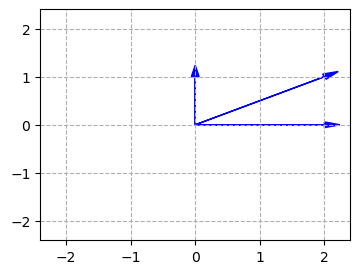

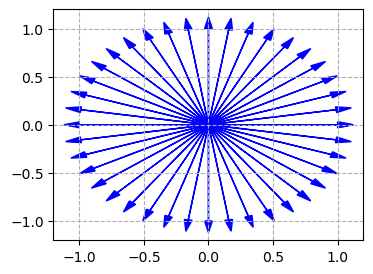

In [13]:
v1 = np.array([2,0])
v2 = np.array([0,1])
v3 = np.array([2,1])
vectors1 = [v1, v2, v3]

alpha = np.linspace(0, 2*np.pi, 41)
vectors2= list(zip(np.cos(alpha), np.sin(alpha)))

plot_vectors(vectors1)
plot_vectors(vectors2)

Change the basis of vector set 1 and 2 to basis $B_1$ and $B_2$ then visualize their representation in new basis.

In [14]:
B1 = np.array([[1, 1], [1, -1]])
B2 = np.array([[2, 1], [1, 2]]) / 2

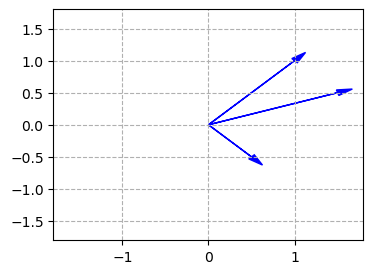

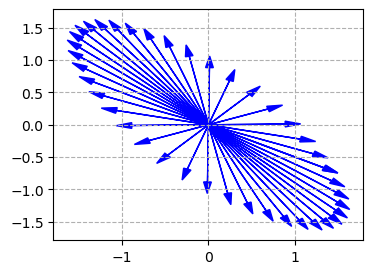

In [15]:
plot_vectors([basis_change(v, np.array([[1, 0], [0, 1]]), B1) for v in vectors1])
plot_vectors([basis_change(v, np.array([[1, 0], [0,1]]), B2) for v in vectors2])